In [ ]:
from oniakRun.aggregate_result import aggregate_result

ks = [8, 10, 12]
root = "/media/mydrive/CDMA"

import json, os
import numpy as np

filename = os.path.join(root, "result/partial/cm{}_k{}_d{}_id*.json")
xs = np.arange(1400, 2001, 20)
ys = {}
cm = {}
agg_keys = {
    "final D size": ("avg", "key", lambda dik: dik["final D size"][0]),
    "final E size": ("avg", "key", lambda dik: dik["final E size"][0]),
    "time": "avg",
}

for k in ks:
    for x in xs:
        ys[k, x] = aggregate_result(filename.format(False, k, x), agg_keys)
        cm[k, x] = aggregate_result(filename.format(True, k, x), agg_keys)
        
# ys, cm

<Axes: title={'center': 'False Negatives Out of 100'}, xlabel='Sketch Size (\\# Counters)', ylabel='False Negative Rate'>

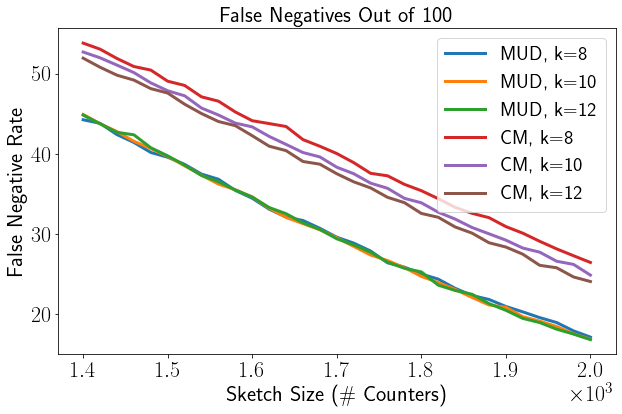

In [12]:
from oniakPlot import line_plot

data = [(xs, np.array([ys[k, x]["final D size"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["final D size"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CM, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "False Negative Rate", 
                      "False Negatives Out of 100", "fnr.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'Decoding time'}, xlabel='Sketch Size (\\# Counters)', ylabel='Time (s)'>

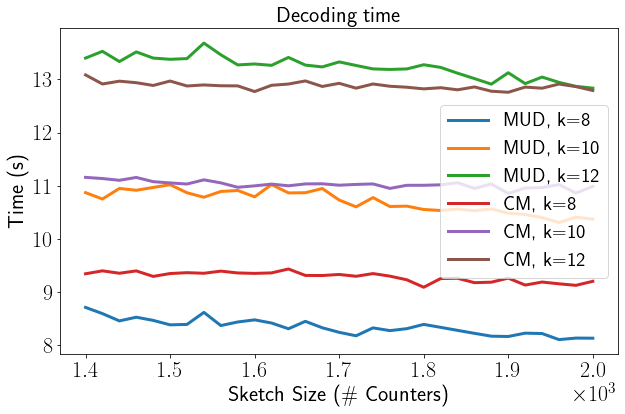

In [11]:
data = [(xs, np.array([ys[k, x]["time"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["time"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CM, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Time (s)", "Decoding time", "cm_time.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'False Positives'}, xlabel='Sketch Size (\\# Counters)', ylabel='False Positive Rate'>

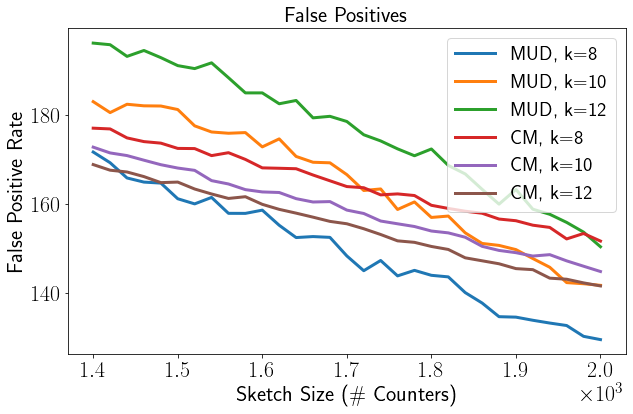

In [13]:
data = [(xs, np.array([ys[k, x]["final E size"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["final E size"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CM, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "False Positive Rate", 
                      "False Positives", "fpr.pdf",
                      figsize=(10, 6))